<span style="font-size: 38px; color: red; font-weight: bold;">Part B: Customer Churn Prediction</span> 

<h1>Overview</h1>

Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.

<h1>Problem Statement</h1>

The goal of this project is to develop a classification model that predicts whether a customer
will churn. Using demographic data (such as gender, senior citizen status, and tenure), along
with information about the services they use (such as internet service, phone service, and
online security), we will attempt to build a model that helps the company identify customers
who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to
keep these customers, thereby improving customer satisfaction and reducing financial loss.


<h1>Importing Necessary Libraries</h1>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

<h1>Importing Customer Dataset</h1>

In [7]:
#importing the dataset
df = pd.read_csv("C:/Users/aryan/Desktop/INTERNSHALA/COURSE 6/Course 6 project/PART B/Customer_data - customer_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<span style="font-size: 38px; color: blue; font-weight: bold;">DATA CLEANING</span> 

<h1>Identifying columns with null values</h1>

In [10]:
#identifying the columns with null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<h1>Handling Missing Values</h1>

In [12]:
# Drop rows where TotalCharges is missing
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

<h1>Dropping Irrelevant Columns</h1>

In [14]:
df = df.drop(columns=['customerID'])


<span style="font-size: 38px; color: blue; font-weight: bold;">EXPLORATORY DATA ANALYSIS</span> 

<h1>Numerical Features Analysis</h1>
We begin our EDA by analyzing the distribution and summary statistics of the numerical features: `tenure`, `MonthlyCharges`, and `TotalCharges`. This helps in understanding customer behavior and detecting any potential skewness or outliers in the data.


In [17]:
# basic descriptive stats
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


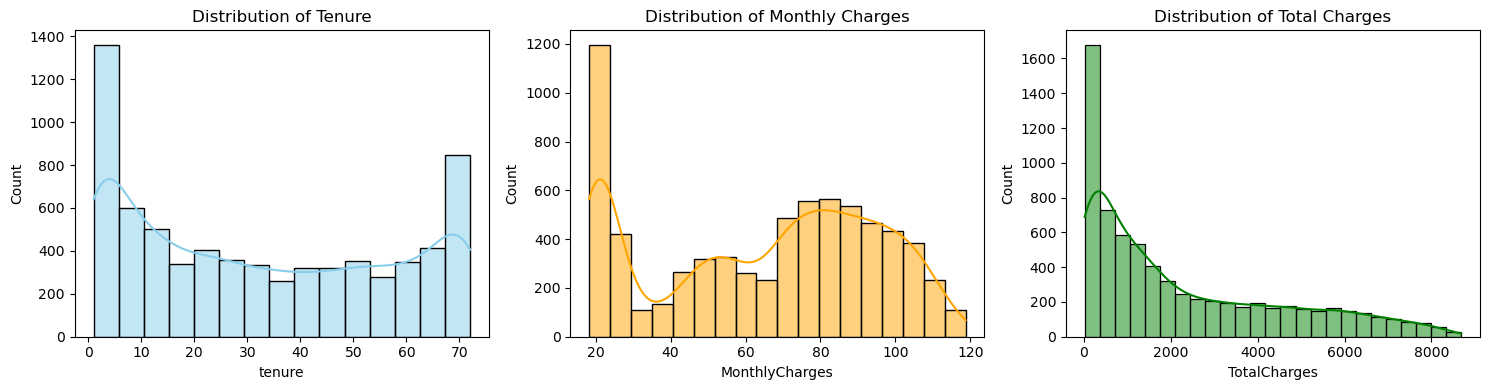

In [18]:
plt.figure(figsize=(15, 4))

# tenure
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')

# monthly Charges
plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='orange')
plt.title('Distribution of Monthly Charges')

# total Charges
plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True, color='green')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


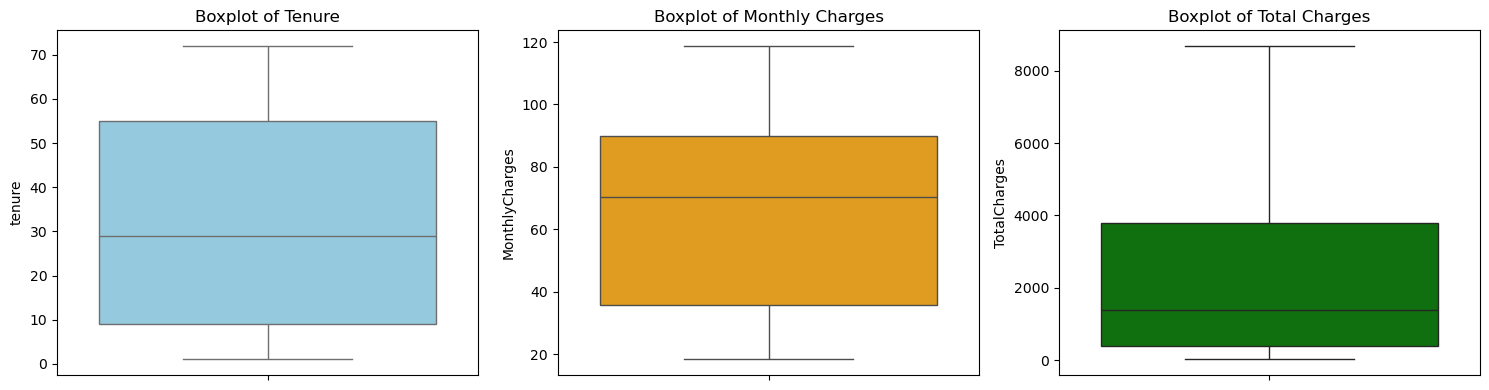

In [19]:
#checking for outliers 

plt.figure(figsize=(15, 4))

# boxplot for tenure
plt.subplot(1, 3, 1)
sns.boxplot(y=df['tenure'], color='skyblue')
plt.title('Boxplot of Tenure')

# boxplot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(y=df['MonthlyCharges'], color='orange')
plt.title('Boxplot of Monthly Charges')

# boxplot for TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(y=df['TotalCharges'], color='green')
plt.title('Boxplot of Total Charges')

plt.tight_layout()
plt.show()



### Summary Statistics of Numerical Features

The dataset contains three key numerical features: `tenure`, `MonthlyCharges`, and `TotalCharges`.

- **Tenure** ranges from 1 to 72 months, with a median of 29. This indicates that half of the customers have stayed for less than ~2.5 years. Boxplot analysis shows no significant outliers in this feature.
- **MonthlyCharges** has a median of approximately \$70, with a minimum of \$18 and a maximum of nearly \$119. It shows slight left skewness, meaning most customers pay on the higher end. No major outliers were detected.
- **TotalCharges** is right-skewed, with a wide range from \$18 to over \$8600. The median is \$1397, but the mean is much higher, indicating the presence of long-term high-value customers. A few high-end values may appear as mild outliers visually, but they seem genuine and not erroneous.

Although some potential outliers are visible, especially in `TotalCharges`, these are likely to be valid values representing high-spending, long-term customers. Since **data scaling will be applied during preprocessing**, there's no immediate need to remove or transform these outliers.


<h1>Categorical Features Analysis</h1>
We continue our EDA by analyzing the categorical features to understand how different customer segments relate to churn. Visualizations and churn rate calculations across categories help uncover patterns in customer behavior, identify high-risk groups, and guide feature selection for modeling.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [23]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract',  'PaperlessBilling', 'PaymentMethod']    

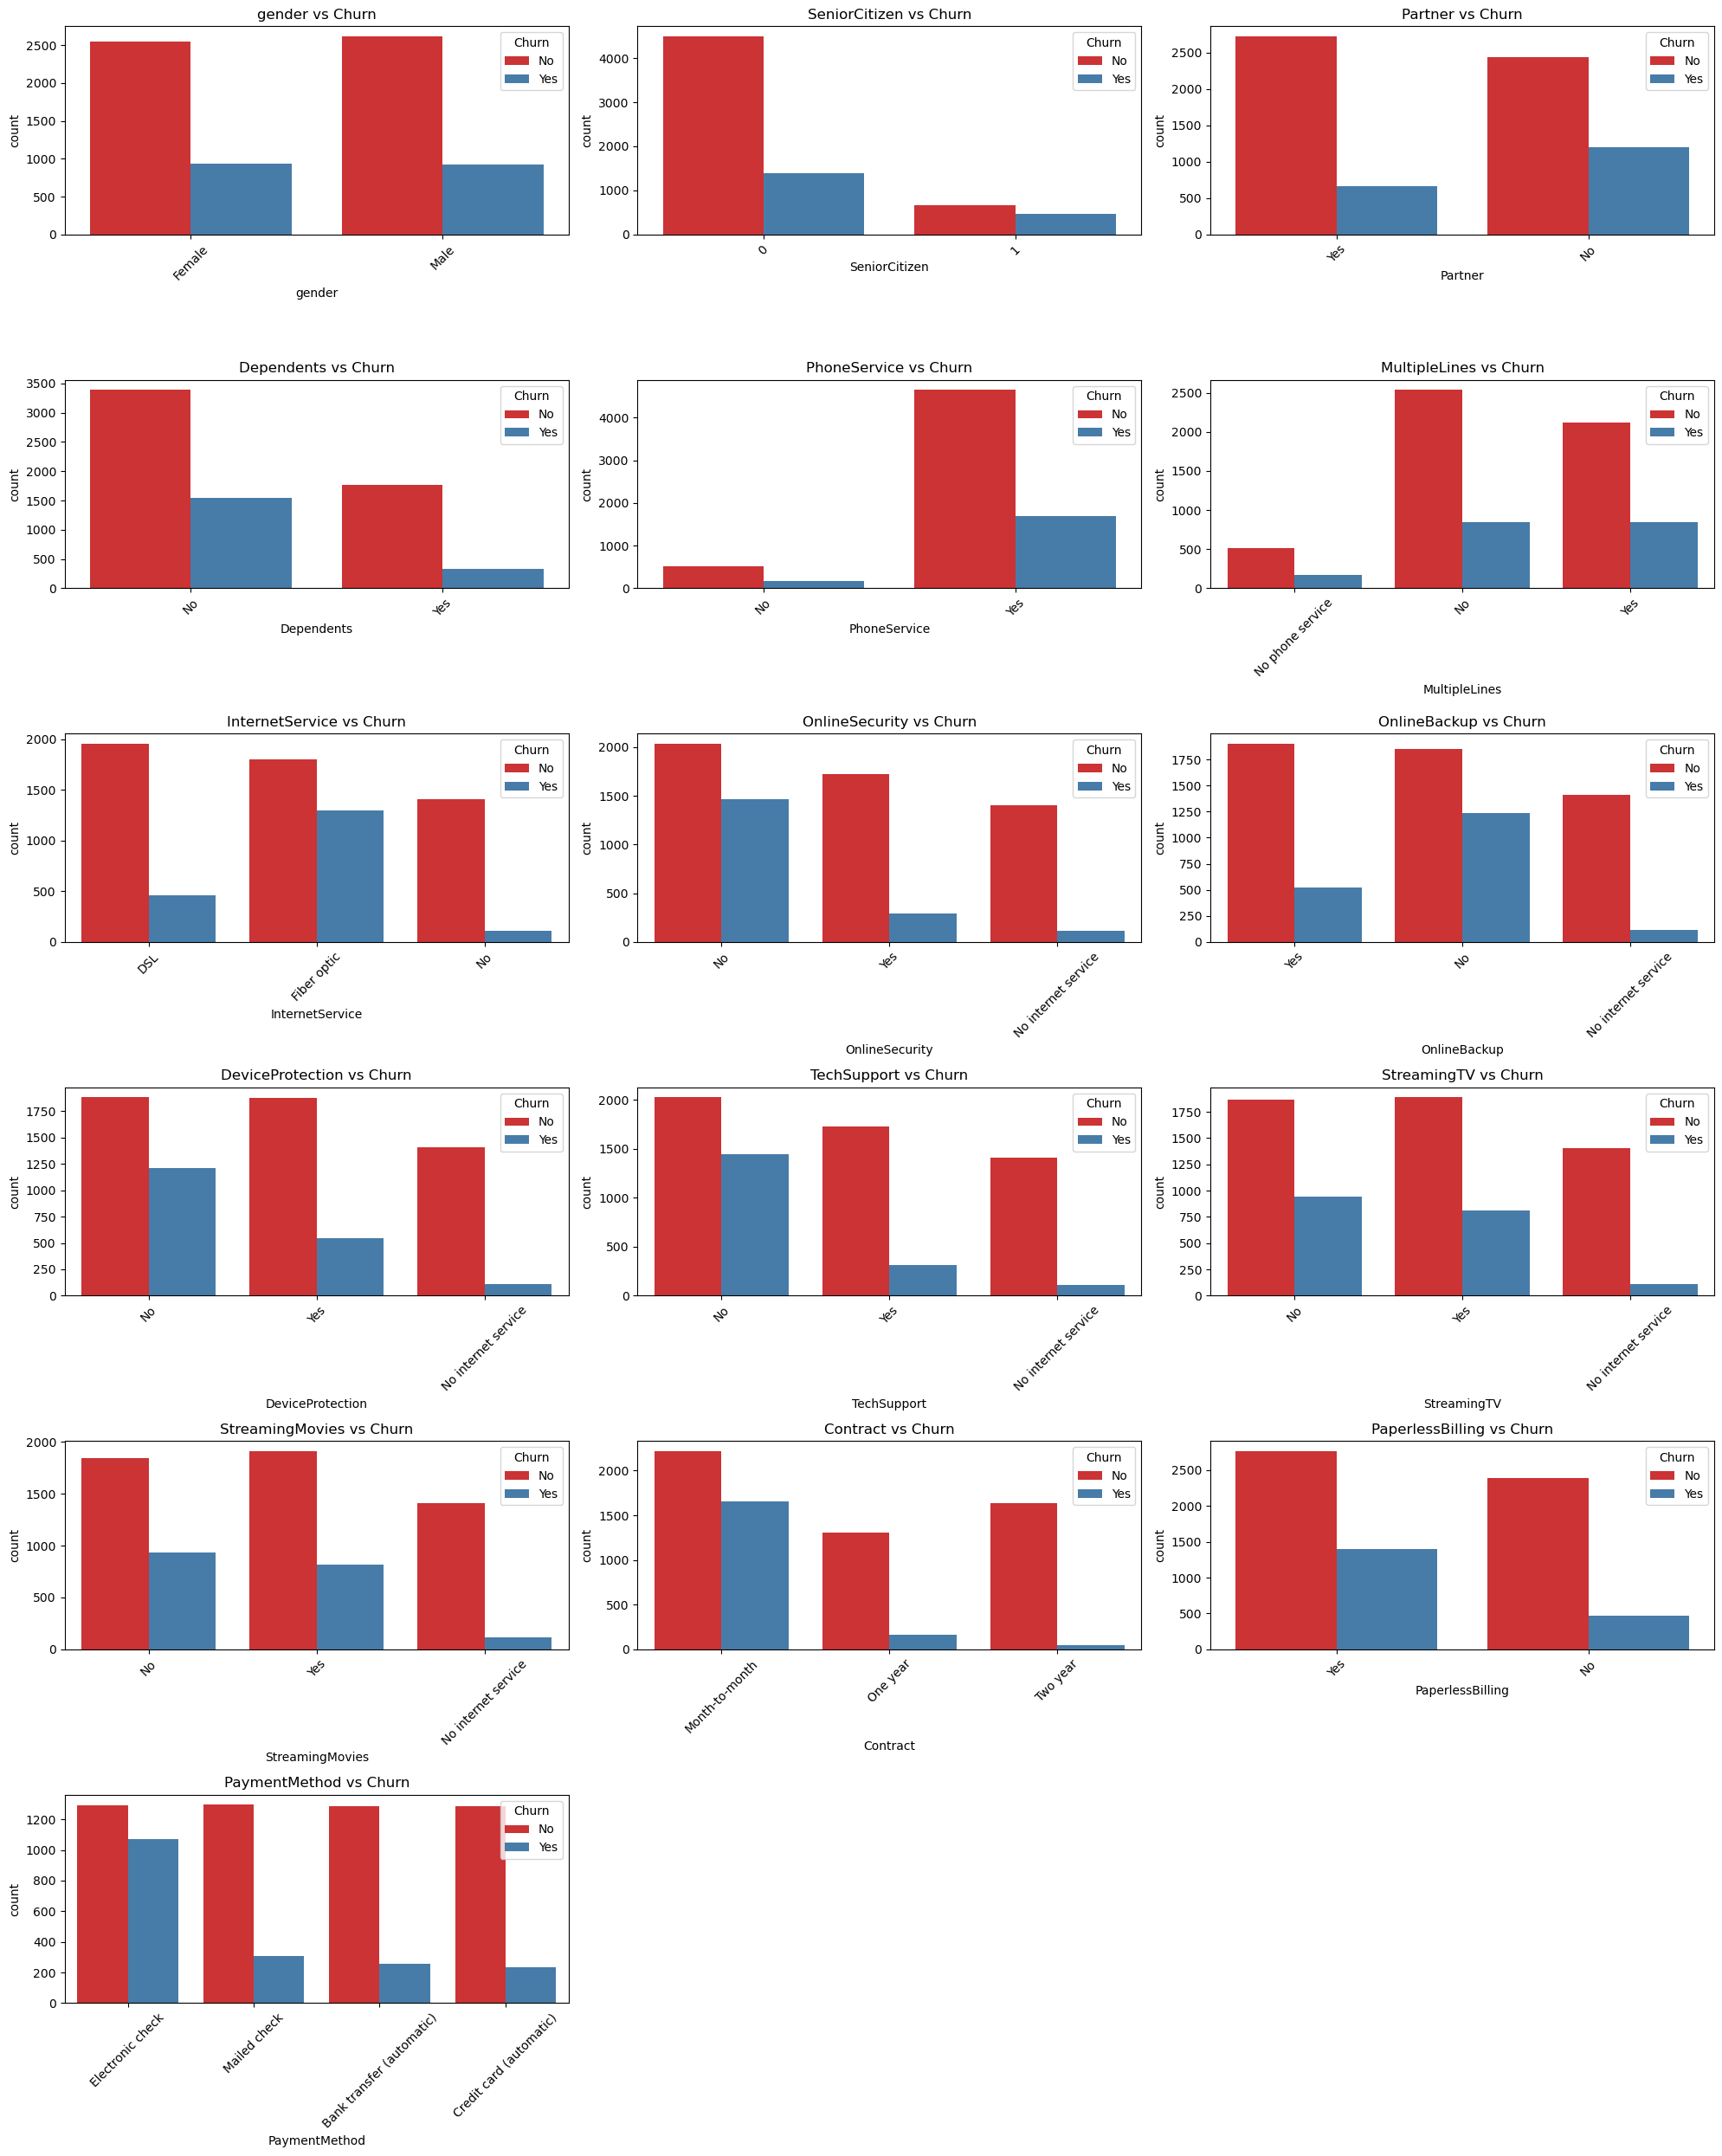

In [24]:
# visualizing churn across categorical features
plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [25]:
#calculating churn percentage within each feature 
for col in categorical_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate = churn_rate.apply(lambda x: round(x * 100, 2))
    print(f"\nChurn % by {col}:\n{churn_rate}")



Churn % by gender:
Churn      No    Yes
gender              
Female  73.04  26.96
Male    73.80  26.20

Churn % by SeniorCitizen:
Churn             No    Yes
SeniorCitizen              
0              76.35  23.65
1              58.32  41.68

Churn % by Partner:
Churn       No    Yes
Partner              
No       67.02  32.98
Yes      80.28  19.72

Churn % by Dependents:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.47  15.53

Churn % by PhoneService:
Churn            No    Yes
PhoneService              
No            75.00  25.00
Yes           73.25  26.75

Churn % by MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

Churn % by InternetService:
Churn               No    Yes
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43

Churn % by OnlineSecurity:
C

### Insights from Categorical Features Analysis

The categorical features offer valuable insights into customer churn behavior across different demographics and service usage patterns:

- **Gender** does not appear to have a significant impact on churn. Both male and female customers exhibit similar churn rates, indicating that gender alone is not a strong predictor.

- **Senior Citizens** show a noticeably higher churn tendency compared to non-senior customers. Age may influence how long a customer is willing to stay, possibly due to differing service expectations or needs.

- Customers who **do not have a partner or dependents** are more likely to churn. This could indicate that customers with family responsibilities are more stable or reliant on services and thus less likely to leave.

- **Internet Service Type** shows a strong influence on churn behavior. Customers using fiber optic internet churn at a higher rate compared to those on DSL or with no internet service. This might suggest dissatisfaction or competition in high-speed internet offerings.

- Features related to **internet-based add-ons**—such as `OnlineSecurity`, `OnlineBackup`, `TechSupport`, and streaming services—show a pattern where customers who have opted out of these services are more likely to churn. This may indicate that customers who do not engage with add-on services feel less tied to the company.

- **Contract type** is one of the most influential features. Customers on month-to-month contracts have the highest churn rates, while those on one- or two-year contracts are significantly less likely to churn. Longer contracts likely offer stability, discounts, or higher switching costs.

- **Paperless billing** is associated with slightly higher churn. This could be tied to the type of customer that opts for paperless options—possibly more tech-savvy and open to switching providers online.

- Among different **payment methods**, customers paying via electronic check tend to churn more often compared to those using automatic payment methods like bank transfers or credit cards. This may reflect a level of commitment or convenience that impacts retention.

Overall, categorical feature analysis reveals that customer tenure context (contract type), service engagement (internet service, add-ons), and lifestyle indicators (senior status, dependents) are critical dimensions for predicting churn.


<span style="font-size: 38px; color: blue; font-weight: bold;">DATA TRANSFORMATION</span> 

In [28]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [29]:
#identifying the numerical columns and the categorical columns in the dataframe that will be used in the model later on
numerical_columns_names = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns_names = ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                             'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                             'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

<h1>Encoding Categorical columns</h1>

In [31]:
# the categorical columns in the data will be encoded using OneHotEncoder 
# one-Hot encoding is used to ensure compatibility across all models without introducing ordinal bias.


# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns from df
encoded_array = encoder.fit_transform(df[categorical_columns_names])

# Get the encoded column names in order
encoded_col_names = encoder.get_feature_names_out(categorical_columns_names)

# Create DataFrame from encoded array
encoded_columns_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)

<span style="font-size: 38px; color: blue; font-weight: bold;">TRAIN-TEST SPLIT</span> 

<h1>Defining the Predictors (X) and the Target (y)</h1>

In [34]:
#defining the predictors by concatenating the numerical columns and the encoded data 
X = pd.concat([df[numerical_columns_names], encoded_columns_df], axis=1)

#defining the target variable which is Churn
# here i am using the map function to convert the values in churn to 0 (no) or 1 (yes)
y = df['Churn'].map({'Yes': 1, 'No': 0})


<h1>Performing Train-test Split</h1>

In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<h1>Scaling the numerical columns for efficiency</h1>

In [38]:
#initialize the standard scaler class 
scaler = StandardScaler()

# Fit and transform the numerical columns of the training set
X_train[numerical_columns_names] = scaler.fit_transform(X_train[numerical_columns_names])

# Transform the numerical part of test set
X_test[numerical_columns_names] = scaler.transform(X_test[numerical_columns_names])

<span style="font-size: 38px; color: blue; font-weight: bold;">TESTING DIFFERENT CLASSIFICATION MODELS</span> 

<h1>LOGISTIC REGRESSION</h1>

In [41]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for tuning
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# grid search with cross validation
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Best tuned model
logreg = logreg_grid.best_estimator_

# Predictions and evaluation
logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_prediction)
print(f"The accuracy score is: {logreg_accuracy * 100: .2f}")
logreg_cr = classification_report(y_test, logreg_prediction)
print("Classification Report:")
print(logreg_cr)



The accuracy score is:  80.38
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



<h1>K-NEAREST NEIGHBORS</h1>

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# grid search with cross validation
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)

# Best model
knn = knn_grid.best_estimator_

# Predictions and evaluation
knn_prediction = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_prediction)
print(f"The accuracy score is: {knn_accuracy * 100: .2f}")
knn_cr = classification_report(y_test, knn_prediction)
print("Classification Report:")
print(knn_cr)



The accuracy score is:  77.26
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.57      0.56      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



<h1>DECISION TREE</h1>

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
dtree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# grid search with cross validation
dtree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_params, cv=5, scoring='f1', n_jobs=-1)
dtree_grid.fit(X_train, y_train)

# Best model
dtree = dtree_grid.best_estimator_

# Predictions and evaluation
dtree_prediction = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_prediction)
print(f"The accuracy score is: {dtree_accuracy * 100: .2f}")
dtree_cr = classification_report(y_test, dtree_prediction)
print("Classification Report:")
print(dtree_cr)


The accuracy score is:  78.96
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1033
           1       0.60      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



<h1>RANDOM FOREST</h1>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# grid search with cross validation
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
rf_model = rf_grid.best_estimator_

# Predictions and evaluation
rf_prediction = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f"The accuracy score is: {rf_accuracy * 100: .2f}")
rf_cr = classification_report(y_test, rf_prediction)
print("Classification Report:")
print(rf_cr)



The accuracy score is:  79.89
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<h1>SUPPORT VECTOR MACHINE</h1>

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parameter grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# grid search with cross validation
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Best model
svm_model = svm_grid.best_estimator_

# Predictions and evaluation
svm_prediction = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_prediction)
print(f"The accuracy score is: {svm_accuracy * 100: .2f}")
svm_cr = classification_report(y_test, svm_prediction)
print("Classification Report:")
print(svm_cr)



The accuracy score is:  79.74
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



<span style="font-size: 38px; color: blue; font-weight: bold;">COMPARING THE MODELS</span> 

In this section, we compare the performance of five classification models using two key metrics: F1-score (for class 1 - churn) and overall accuracy. The F1-score is especially important in churn prediction, as it balances precision and recall—helping us evaluate how well each model identifies customers likely to churn. Accuracy gives a general sense of overall correctness but can be misleading in imbalanced datasets, which is why F1-score is prioritized in our comparison. A bar plot is used for a clear visual comparison across models.

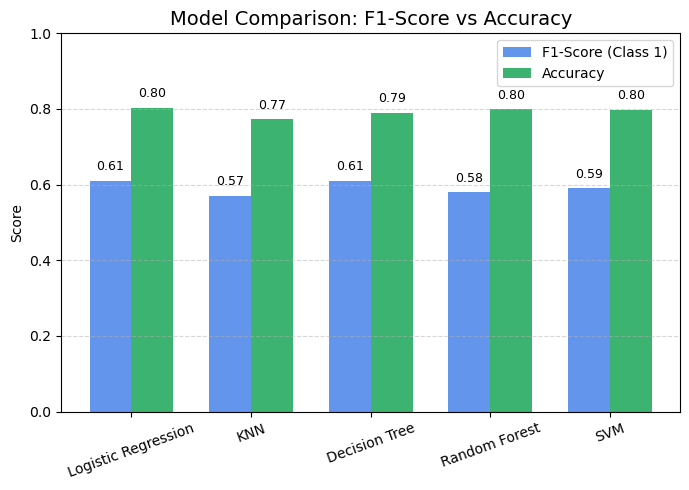

In [51]:
from sklearn.metrics import classification_report

# list of prediction variables to be used in the for loop 
predictions = [logreg_prediction, knn_prediction, dtree_prediction, rf_prediction, svm_prediction]

# corresponding model names 
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']

# list to store the f1 scores 
f1_scores = []

# loop through predictions and extract f1 for class '1'
for preds in predictions:
    report = classification_report(y_test, preds, output_dict=True)
    f1 = round(report['1']['f1-score'], 2)
    f1_scores.append(f1)

# accuracy values of each of the models 
accuracy_scores = [logreg_accuracy, knn_accuracy, dtree_accuracy, rf_accuracy, svm_accuracy]

# Bar positions
x = np.arange(len(model_names))
width = 0.35

# creating a grouped bar plot 
plt.figure(figsize=(7, 5))
bars1 = plt.bar(x - width/2, f1_scores, width, label='F1-Score (Class 1)', color='cornflowerblue')
bars2 = plt.bar(x + width/2, accuracy_scores, width, label='Accuracy', color='mediumseagreen')

plt.title('Model Comparison: F1-Score vs Accuracy', fontsize=14)
plt.ylabel('Score')
plt.xticks(x, model_names, rotation=20)
plt.ylim(0, 1)
plt.legend()

# adding data labels to each bar 
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h1>Key Insights from Model Comparison</h1>

#### Metrics Used for Evaluation
- We compared five classification models using two key metrics: F1-score for class 1 (churn) and overall accuracy.
- F1-score was prioritized because it balances precision and recall, making it more reliable for evaluating model performance on the minority class (churners).
- Accuracy provides a general sense of correctness, but may not reflect how well a model detects churners in an imbalanced dataset.

#### Top Performing Model After Tuning
- After applying hyperparameter tuning to all models, both Logistic Regression and Decision Tree achieved the highest F1-score (0.61).
- However, Logistic Regression maintained the best overall accuracy (80.38%) and demonstrated consistent, balanced performance.
- It also offers the advantage of being simpler and more interpretable compared to other models, which is valuable in a business context.

#### Performance of Other Models
- K-Nearest Neighbors (KNN) improved after tuning but still had the lowest F1-score (0.57).
- Random Forest and SVM both performed better than their untuned versions, achieving F1-scores of 0.58 and 0.59 respectively, but neither surpassed Logistic Regression.
- Decision Tree improved significantly with tuning and matched Logistic Regression's F1-score, but had slightly lower accuracy (78.96%).

#### Visual Comparison
- A grouped bar chart was used to visually compare the F1-score and accuracy of all models.
- This visual representation helped highlight the trade-offs between overall correctness and churn-specific prediction performance.

#### Final Model Selection
- Based on the tuned model results, Logistic Regression was selected as the final model for deployment.
- Its combination of strong F1-score, top accuracy, and ease of interpretation makes it the most suitable choice for churn prediction in a real-world business setting.
sed churn prediction.
 with business goals.
classes.


<span style="font-size: 38px; color: blue; font-weight: bold;">BUILDING A PREDICTION CLASS</span> 

In [54]:
# Use the same input_columns = X_train.columns.tolist()
input_columns = X_train.columns.tolist()
class ChurnPredictor:
    def __init__(self, encoder, scaler, model, input_columns):
        self.encoder = encoder
        self.scaler = scaler
        self.model = model
        self.input_columns = input_columns

    #function to take user input
    def take_input(self):
        print("Please provide the following details to predict if the customer will churn:\n")

        tenure = float(input("Tenure (number of months with the company): "))
        monthly_charges = float(input("Monthly Charges ($): "))
        total_charges = float(input("Total Charges ($): "))

        #reusable function
        def numbered_input(prompt, options):
            print(f"\n{prompt}")
            for i, opt in enumerate(options):
                print(f"{i} - {opt}")
            choice = int(input("Enter the number corresponding to your choice: "))
            return options[choice]

        gender = numbered_input("Gender:", ['Female', 'Male'])
        senior = numbered_input("Senior Citizen:", ['No', 'Yes'])
        senior = 1 if senior == 'Yes' else 0
        partner = numbered_input("Partner:", ['No', 'Yes'])
        dependents = numbered_input("Dependents:", ['No', 'Yes'])
        phone_service = numbered_input("Phone Service:", ['No', 'Yes'])
        multiple_lines = numbered_input("Multiple Lines:", ['No', 'Yes', 'No phone service'])
        internet_service = numbered_input("Internet Service:", ['DSL', 'Fiber optic', 'No'])
        online_security = numbered_input("Online Security:", ['No', 'Yes', 'No internet service'])
        online_backup = numbered_input("Online Backup:", ['No', 'Yes', 'No internet service'])
        device_protection = numbered_input("Device Protection:", ['No', 'Yes', 'No internet service'])
        tech_support = numbered_input("Tech Support:", ['No', 'Yes', 'No internet service'])
        streaming_tv = numbered_input("Streaming TV:", ['No', 'Yes', 'No internet service'])
        streaming_movies = numbered_input("Streaming Movies:", ['No', 'Yes', 'No internet service'])
        contract = numbered_input("Contract Type:", ['Month-to-month', 'One year', 'Two year'])
        paperless_billing = numbered_input("Paperless Billing:", ['No', 'Yes'])
        payment_method = numbered_input("Payment Method:", [
            'Bank transfer (automatic)',
            'Credit card (automatic)',
            'Electronic check',
            'Mailed check'
        ])

        # Convert input into a DataFrame
        input_data = pd.DataFrame([{
            'tenure': tenure,
            'MonthlyCharges': monthly_charges,
            'TotalCharges': total_charges,
            'gender': gender,
            'SeniorCitizen': senior,
            'Partner': partner,
            'Dependents': dependents,
            'PhoneService': phone_service,
            'MultipleLines': multiple_lines,
            'InternetService': internet_service,
            'OnlineSecurity': online_security,
            'OnlineBackup': online_backup,
            'DeviceProtection': device_protection,
            'TechSupport': tech_support,
            'StreamingTV': streaming_tv,
            'StreamingMovies': streaming_movies,
            'Contract': contract,
            'PaperlessBilling': paperless_billing,
            'PaymentMethod': payment_method
        }])

        return input_data

    def preprocess_input(self, input_data):
        numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        categorical_features = [col for col in input_data.columns if col not in numerical_features]

        encoded = self.encoder.transform(input_data[categorical_features])
        encoded_df = pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out(categorical_features))

        scaled = self.scaler.transform(input_data[numerical_features])
        scaled_df = pd.DataFrame(scaled, columns=numerical_features)

        processed = pd.concat([scaled_df, encoded_df], axis=1)
        processed = processed.reindex(columns=self.input_columns, fill_value=0)

        return processed

    def predict(self, input_data):
        processed_input = self.preprocess_input(input_data)
        prediction = self.model.predict(processed_input)
        return prediction[0]


In [55]:
# Instantiate the prediction class
predictor = ChurnPredictor(
    encoder=encoder,
    scaler=scaler,
    model=logreg,
    input_columns=input_columns
)

# Collect input and make prediction
user_input_df = predictor.take_input()
prediction = predictor.predict(user_input_df)

# Output result
if prediction == 1:
    print("\nPrediction: The customer is likely to churn.")
else:
    print("\nPrediction: The customer is not likely to churn.")


Please provide the following details to predict if the customer will churn:



Tenure (number of months with the company):  15
Monthly Charges ($):  150
Total Charges ($):  1500



Gender:
0 - Female
1 - Male


Enter the number corresponding to your choice:  1



Senior Citizen:
0 - No
1 - Yes


Enter the number corresponding to your choice:  1



Partner:
0 - No
1 - Yes


Enter the number corresponding to your choice:  0



Dependents:
0 - No
1 - Yes


Enter the number corresponding to your choice:  1



Phone Service:
0 - No
1 - Yes


Enter the number corresponding to your choice:  1



Multiple Lines:
0 - No
1 - Yes
2 - No phone service


Enter the number corresponding to your choice:  1



Internet Service:
0 - DSL
1 - Fiber optic
2 - No


Enter the number corresponding to your choice:  0



Online Security:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  1



Online Backup:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  1



Device Protection:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  1



Tech Support:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  0



Streaming TV:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  1



Streaming Movies:
0 - No
1 - Yes
2 - No internet service


Enter the number corresponding to your choice:  0



Contract Type:
0 - Month-to-month
1 - One year
2 - Two year


Enter the number corresponding to your choice:  0



Paperless Billing:
0 - No
1 - Yes


Enter the number corresponding to your choice:  1



Payment Method:
0 - Bank transfer (automatic)
1 - Credit card (automatic)
2 - Electronic check
3 - Mailed check


Enter the number corresponding to your choice:  0



Prediction: The customer is not likely to churn.


<h1>Prediction Class Overview</h1>

1. **Automated Data Preprocessing**  
   The class automatically handles both **encoding of categorical features** and **scaling of numerical ones**. This ensures the model always receives the correctly formatted data, improving its performance and accuracy.

2. **User-Friendly Input System**  
   The `take_input` method guides users through providing their details with clear, numbered options for categorical features. This makes it ideal for real-time churn prediction applications where non-technical users need to provide inputs easily.

3. **Consistent Data Format**  
   The class ensures that the input data is always formatted in the exact way the model expects. This reduces errors and ensures reliable, consistent predictions when deployed in real-world scenarios.

4. **Easy Integration with Different Models**  
   This class is designed to be flexible and can easily work with different machine learning models. You can swap models without modifying the input or preprocessing pipeline, allowing you to quickly experiment with different algorithms and find the best performer.

5. **Scalable for Future Features**  
   The class is designed to be easily extended as you add more customer features. Whether you're adding new features or modifying existing ones, the class can scale without major changes, making it adaptable to future needs.

6. **Clear and Actionable Predictions**  
   The class outputs straightforward results—whether a customer is likely to churn or not. This clarity makes it easy for non-technical stakeholders to understand the results and take action accordingly.

7. **Improved Model Accuracy**  
   By ensuring that all data is preprocessed correctly, the class helps prevent issues that could degrade model performance. The consistent handling of data increases the likelihood of accurate churn predictions and improved model reliability.


<span style="font-size: 38px; color: blue; font-weight: bold;">CONCLUSION</span> 

<h1>Key Insights and Actionable Strategies</h1>


### 1. **Gender**
- Churn rate for **Female** and **Male** customers is almost identical (around 27%).
- **Action**: Gender does not appear to be a significant differentiator for churn. Therefore, personalized retention strategies should be focused on factors other than gender.

### 2. **Senior Citizen**
- Senior citizens (**41.68% churn**) have a much higher churn rate compared to non-senior citizens (**23.65% churn**).
- **Action**: Consider offering tailored support and benefits to senior citizens, such as personalized customer service, easy-to-use plans, or discounts on longer-term contracts to reduce churn in this group.

### 3. **Partner**
- Customers with a **Partner** have a much lower churn rate (**19.72%**) compared to those without a partner (**32.98%**).
- **Action**: Develop strategies that encourage customers without a partner to stay engaged. Consider offering family or multi-account discounts, or creating bundle deals that cater to both individuals and families.

### 4. **Dependents**
- **Customers with Dependents** have a significantly higher churn rate (**31.28%**) compared to those without dependents (**15.53%**).
- **Action**: For customers with dependents, consider providing family plans or special offers that address the needs of households, such as multi-line discounts or family-focused features.

### 5. **Phone Service**
- **Customers without phone service** have a slightly lower churn rate (**25.00%**) compared to those with phone service (**26.75%**).
- **Action**: Although the difference is small, you might consider focusing on enhancing the value proposition of customers with phone service to reduce churn further.

### 6. **Multiple Lines**
- **Customers with multiple lines** have a lower churn rate (**28.65%**) compared to those without multiple lines (**25.08%**).
- **Action**: Promote multi-line plans more aggressively, highlighting cost savings and convenience for customers.

### 7. **Internet Service**
- **Fiber optic** users have a much higher churn rate (**41.89%**) compared to **DSL** users (**19.00%**) or customers with no internet service (**7.43%**).
- **Action**: Investigate the reasons behind the high churn among fiber optic users. It could be related to pricing, service quality, or customer support. Offering better service plans or addressing these concerns can reduce churn.

### 8. **Online Security & Backup**
- Both **Online Security** and **Online Backup** customers who opt for **"No internet service"** have almost no churn (**7.43%**), while those who have the service show a much higher churn rate (around **40%**).
- **Action**: Consider revising the pricing or service levels for these features. Providing value-added services, such as more reliable security or backup, could help reduce churn in these segments.

### 9. **Tech Support**
- **No Tech Support** customers have a significantly higher churn rate (**41.65%**) than those with support (**15.20%**).
- **Action**: Invest in enhancing technical support services or promote the availability of support more aggressively. Offering tiered support options or guarantees may reduce churn.

### 10. **Streaming TV & Movies**
- **Customers with Streaming TV/Movies** have a moderate churn rate (~30%).
- **Action**: This segment may be highly competitive. Offering exclusive content, personalized recommendations, or premium plans could help reduce churn.

### 11. **Contract**
- **Month-to-month contracts** show a significantly higher churn rate (**42.71%**) compared to **one year** (**11.28%**) or **two year** contracts (**2.85%**).
- **Action**: Encourage customers on month-to-month contracts to switch to longer-term contracts by offering discounts, loyalty rewards, or other incentives. Lock-in periods can increase retention and reduce churn.

### 12. **Paperless Billing**
- **Customers with Paperless Billing** have a higher churn rate (**33.59%**) than those without (**16.38%**).
- **Action**: Investigate why paperless billing customers are churning more and whether there are specific pain points (e.g., payment issues, customer service) that can be addressed.

### 13. **Payment Method**
- **Electronic check** users have the highest churn rate (**45.29%**) compared to other payment methods (credit card, bank transfer).
- **Action**: Investigate why electronic check users have higher churn and consider offering alternative payment options or incentives for choosing more reliable payment methods.

---

### **Summary of Key Action Points**:
1. **Target Seniors and Customers with Dependents**: Create special offers and support for these groups to reduce churn.
2. **Promote Longer-Term Contracts**: Focus on converting month-to-month customers to longer-term contracts.
3. **Improve Tech Support and Service Features**: Enhance support and valuable services to retain customers, especially those using online security, tech support, and backup services.
4. **Incentivize Family Plans**: Encourage more multi-line plans, especially for customers without a partner or dependents.
5. **Address Churn Among Fiber Optic Users**: Investigate the high churn rate among fiber optic users and improve the service or pricing structure.
